<h1><b>2. Data Sampling and Distribution</b></h1>
<p>Let's first import the required libraries for this chapter.</p>

In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

<p>We can now define the paths to our datasets.</p>

In [3]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

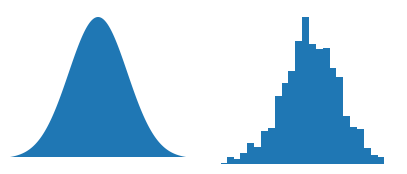

In [4]:
# Figure 2-1
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5, 2))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position

plt.show()


<p><i>Figure 2-1. Population versus sample</i></p>
<hr>
<h2><b>2.1 Sampling Distribution of a Statistic</b></h2>
<p><i>Sampling distribution</i> refers to the distribution of some sample statistic over <i>many</i> samples drawn from the same population. Normally, you draw a sample with the objective of <i>measuring</i> (sample statistic) or <i>modelling</i> something (statistical/ML model). We want to know how different our estimate or model might be, and thus <i>sampling variability</i> becomes relevant. Let's use the data on annual income for applicants to Lending Club, as we had done before in Chapter 1.</p>

In [5]:
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5'
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20'
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
40292   63000.0  Data
38959   92000.0  Data
17361  134000.0  Data
33996   52000.0  Data
26491   43000.0  Data


<p>We can use <code>seaborn</code>'s <code>FacetGrid</code> to attain a visualization of three different histograms using these samples:</p>

c:\Users\Felipe\python_work\notebooks\py_practical_statistics\practical_statistics\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\Felipe\python_work\notebooks\py_practical_statistics\practical_statistics\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\Felipe\python_work\notebooks\py_practical_statistics\practical_statistics\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


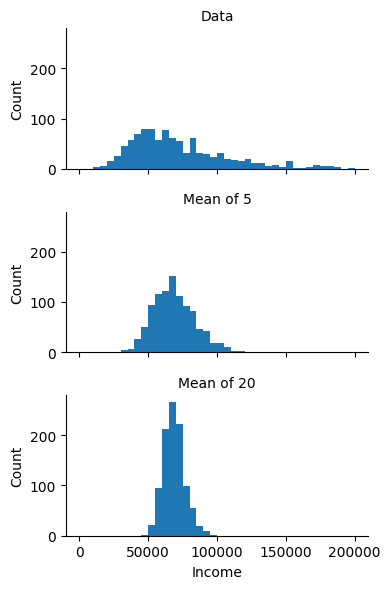

In [6]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

<p><i>Figure 2-6. Histogram of annual incoms of 1000 loan applicants (top), then 1000 means of n=5 applicants (middle), and finally 1000 means of n=20 applicants (bottom).</i></p>
<p>We can see that the histogram of the individual values is broadly spread out and skewed toward <i>higher</i> values. As we get sample sizes with means of 5 and 20, the histograms become increasingly compact and more bell-shaped.</p>
<h2>2.2 Central Limit Theorem</h2>
The <i>central limit theorem</i> states that the means drawn from multiple samples will resemble the familiar bell-shaped normal curve <i>even</i> if the source population is <i>not</i> normally distributed, provided that the sample size is large enough and the departure of the data from normality is not too great.</p>
</h3>2.2.1 Standard Error</h3>
<p>The <i>standard error</i> sums up the <i>variability</i> in the <strong>sampling</strong> distribution for a statistic. You can estimate it by using a statistic based on the standard deviation <i>s</i> of the sample values, and the sample size <i>n</i>. As <i>n</i> increases, the SE <strong>decreases</strong>.</p>


<div style="background: lightblack; 
            font-size: 16px; 
            padding: 10px; 
            border: 1px solid lightgray; 
            margin: 10px;">
  <h4><strong>Takeaways:</strong></h4>
<ul>
<li>The frequency of a sample statistic tells us how that metric would turn out differently from sample to sample.</li>
<li>A key metric that sums up the variability of a sample statistic is its standard error.</li>
</ul>
</p>
</div>
<h2>2.3 The Bootstrap</h2>
<p>The <i>bootstrap</i> procedure consists on drawing additional samples, with replacement, from the sample and recalculate the statistic or model for each resample. Basically, you would replicate the original sample many times for the purpose of estimating a sampling distribution.</p>
<p>Let's see its application in Python with <code>scikit-learn</code>'s <code>resample</code> method.</p>

In [7]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'Original: {loans_income.median()}')
print(f'Bias: {results.mean() - loans_income.median()}')
print(f'Std. Error: {results.std()}')

Bootstrap Statistics:
Original: 62000.0
Bias: -82.09799999999814
Std. Error: 228.73933106830927


<p>In conclusion, the <i>bootstrap</i> is a powerful tool for evaluating the variability of a sample statistic.</p>
<hr>
<h2>2.4 Confidence Intervals (lots of notes here!) </h2>
<p>Just as frequency tables, boxplots, and histograms, <i>confidence intervals</i> are another way to understand the <strong>potential error</strong> in a sample estimate. As a countermeasure to the use of <i>point estimates</i> (a single number), presenting an estimate as a <strong>range</strong> is a way to ground our findings in statistical sampling principles.</p>
<strong>Confidence intervals</strong> are presented in a coverage level, often represented by a high percentage such as 90% or 95%. Example:
<ul>
<li>A <strong>90%</strong> interval represents the interval that encloses the <i>central</i> 90% of the bootstrap sampling distribution of a samples statistic; as such, in 90% of the cases the sample estimate should contain similar sample estimates.</li>
</ul>
<p>The following steps indicate the procedures to get the algorithm for a bootstrap confidence interval:</p>
<ol>
<li>Draw a random sample size of <i>n</i> with replacement from the data.</li>
<li>Record the statistic of interest for the resample.</li>
<li>Repeat steps 1-2 many (<i>R</i>) times.</li>
<li>For an <i>x%</i> confidence interval, trim [(100-<i>x</i>) / 2]% of the <i>R</i> resample results from either end of the distribution.</li>
<li>The trim points are the enpoints of an <i>x%</i> bootstrap confidence interval.</li>
</ol>
<p>Let's visualize the process in Python:</p>

In [8]:
print(loans_income.mean())
np.random.seed(seed=3)
# Create a sample of 20 loean income data
sample_20 = resample(loans_income, n_samples=20, replace=False)
print(sample_20.mean())

68760.51844
55734.1


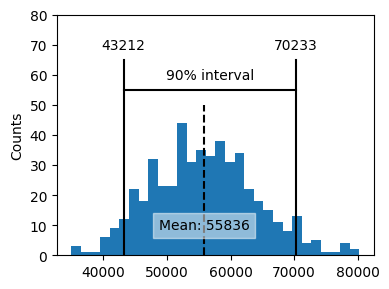

In [9]:
results = []
for nrepeat in range(500):
    sample = resample(sample_20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}',
            horizontalalignment='center', verticalalignment='center')

ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

mean_income = results.mean()
ax.plot([mean_income, mean_income], [0, 50], color='black', linestyle='--')
ax.text(mean_income, 10, f'Mean: {mean_income:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

<p><i>Figure 2-9. Bootstrap confidence interval for the annual income of loan applicants, based on sample of 20</i<></p>